# Solution 2

In [1]:
# Basic information of alarms
# viz the graph

# Try TTPM Method
# Try notears
# Try another method in book


# S2: try more preprocessing

In [2]:
# S_1_2 notears

In [3]:
import os
import numpy as np
import pandas as pd

import os
from castle.common.priori_knowledge import PrioriKnowledge
# os.path.abspath('.')

In [4]:
import plotly.express as px
import plotly.graph_objects as go


# Read Data

In [5]:
dataset = 'dataset_1'

def read_data(dataname = 'dataset_1'):
    # alarm data
    alarms = pd.read_csv(r'./datasets/dataset_1/alarm.csv')
    # causal_prior
    causal_prior= np.load(r'./datasets/dataset_1/causal_prior.npy')

    # topology
    topology = np.load(r'./datasets/dataset_1/topology.npy')

    # rca
    rca_prior = pd.read_csv(r'./datasets/dataset_1/rca_prior.csv')

    print(f"shape of alarm data: {alarms.shape}")
    print(f"shape of causal prior matrix: {causal_prior.shape}")
    print(f"shape of topology prior matrix: {topology.shape}")
    print(f"shape of rca prior matrix: {rca_prior.shape}")
    # Notes: topology.npy and rca_prior.csv are not used in this script.
    
    return alarms, causal_prior, topology, rca_prior

In [55]:
# dataset = 'dataset_4'

def read_data(dataset = 'dataset_1'):

    # alarm data
    alarms = pd.read_csv(r'./datasets/{}/alarm.csv'.format(dataset))
    # causal_prior
    causal_prior= np.load(r'./datasets/{}/causal_prior.npy'.format(dataset))

    # # topology
    topology = np.load(r'./datasets/{}/topology.npy'.format(dataset))

    # # rca
    rca_prior = pd.read_csv(r'./datasets/{}/rca_prior.csv'.format(dataset))

    print(f"shape of alarm data: {alarms.shape}")
    print(f"shape of causal prior matrix: {causal_prior.shape}")
    print(f"shape of topology prior matrix: {topology.shape}")
    print(f"shape of rca prior matrix: {rca_prior.shape}")
    print("_________")
    
    return alarms, causal_prior, topology, rca_prior


# Notes: topology.npy and rca_prior.csv are not used in this script.

In [56]:
alarms, causal_prior, topology, rca_prior = read_data(dataset = 'dataset_1')
alarms, causal_prior, topology, rca_prior = read_data(dataset = 'dataset_2')
alarms, causal_prior, topology, rca_prior = read_data(dataset = 'dataset_3')
# alarms, causal_prior, topology, rca_prior = read_data(dataname = 'dataset_1')

shape of alarm data: (141853, 4)
shape of causal prior matrix: (39, 39)
shape of topology prior matrix: (35, 35)
shape of rca prior matrix: (49, 2)
_________
shape of alarm data: (132688, 4)
shape of causal prior matrix: (49, 49)
shape of topology prior matrix: (42, 42)
shape of rca prior matrix: (47, 2)
_________
shape of alarm data: (198962, 4)
shape of causal prior matrix: (31, 31)
shape of topology prior matrix: (39, 39)
shape of rca prior matrix: (43, 2)
_________


In [52]:
causal_prior.shape, topology.shape

((31, 31), (39, 39))

In [8]:
prior_knowledge = PrioriKnowledge(causal_prior.shape[0])
for i, j in zip(*np.where(causal_prior == 1)):
    prior_knowledge.add_required_edge(i, j)

for i, j in zip(*np.where(causal_prior == 0)):
    prior_knowledge.add_forbidden_edge(i, j)

# EDA and Preprocessing

In [9]:
# How is the alarm data organized?
# How does it looks like

In [10]:
alarms.head()

,alarm_id,device_id,start_timestamp,end_timestamp
0,0,7,14,85
1,6,30,17,100
2,25,3,18,54
3,13,3,19,64
4,26,31,19,62


In [11]:
# turn alarm_id and device_id into categorical data
alarms['alarm_id'] = alarms['alarm_id'].astype('category')
alarms['device_id'] = alarms['device_id'].astype('category')

In [12]:
alarms.shape

(198962, 4)

In [13]:
# is the alarm random?

alarms.groupby('alarm_id').count()

,device_id,start_timestamp,end_timestamp
alarm_id,,,
0,16980,16980,16980
1,1943,1943,1943
2,777,777,777
3,5501,5501,5501
4,184,184,184
5,578,578,578
6,7969,7969,7969
7,15012,15012,15012
8,13211,13211,13211


In [14]:
# random select
alarms_sample = alarms.sample(n=10000, random_state=1)

# view of device_id
px.scatter(alarms_sample, y='device_id', x='start_timestamp', color='device_id')

In [15]:
# view of alarm_id
px.scatter(alarms_sample, y='alarm_id', x='start_timestamp', color='alarm_id')

In [16]:
# view together

px.scatter(alarms_sample, y='device_id', x='start_timestamp', color='alarm_id')

In [17]:
## count of device and alarm
alarm_count = alarms.groupby('device_id').count().reset_index().sort_values(by='alarm_id', ascending=False)
alarm_count

,device_id,alarm_id,start_timestamp,end_timestamp
6,6,15649,15649,15649
5,5,13054,13054,13054
23,23,12197,12197,12197
33,33,11222,11222,11222
3,3,11081,11081,11081
16,16,10791,10791,10791
35,35,10461,10461,10461
7,7,10250,10250,10250
18,18,9176,9176,9176
32,32,9026,9026,9026


In [18]:
px.histogram(alarm_count, x='alarm_id', color='device_id')

# 观察一下prior knowledge


In [19]:
### 看一下哪里有causal关系，是不是在比较多的数量还是比较少的数量上的

# 有明确专家知识的只有25, 25的数量也不多，猜想相对大量高频出现的报警其实是没有causal关系的，因为这些报警是由于其他的报警引起的，而不是由于设备本身的问题引起的。
pri_df = pd.DataFrame(causal_prior).reset_index().melt(id_vars='index')
pri_df.columns = ['from', 'to', 'value']
px.density_heatmap(pri_df, x='from', y='to',z='value',histfunc='avg', nbinsx=31, nbinsy=31)

# 观察一下Topology

In [22]:
pri_df = pd.DataFrame(topology).reset_index().melt(id_vars='index')
pri_df.columns = ['from', 'to', 'value']
px.density_heatmap(pri_df, x='from', y='to',z='value',histfunc='avg', nbinsx=31, nbinsy=31)

## 多窗口处理

In [24]:
## 预处理 Duration是不是会有影响

# 如何embedding结束时间带来的影响？

In [25]:
def make_window_sample(alarms, win_size = 300):
    """make window size"""
    alarms = alarms.sort_values(by='start_timestamp')
    alarms['win_id'] = alarms['start_timestamp'].map(lambda elem:int(elem/win_size))

    
    shape_alarm = alarms.shape
    # 去掉一些一个window内太多或者太少的
    max = alarms.groupby(['win_id'])['start_timestamp'].count().quantile(0.9)
    min = alarms.groupby(['win_id'])['start_timestamp'].count().quantile(0.05)
    alarms = alarms.groupby(['win_id']).filter(lambda x: len(x) < max and len(x) > min)
    print("Total {} removed {} alarms".format(shape_alarm[0],shape_alarm[0] - alarms.shape[0]))
    
    
    samples=alarms.groupby(['alarm_id','win_id'])['start_timestamp'].count().unstack('alarm_id')
    samples = samples.dropna(how='all').fillna(0)
    samples = samples.sort_index(axis=1)
    
    return samples

def make_window_sample_multi(alarms, win_size = [300, 600, 900, 1200]):
    """make window size"""

    s_list = []
    for w in win_size:
        s = make_window_sample(alarms, win_size = w)
        s_list.append(s)
    s_all = pd.concat(s_list)
    
    
    return s_all

In [26]:
samples = make_window_sample_multi(alarms)

Total 198962 removed 60926 alarms
Total 198962 removed 51999 alarms
Total 198962 removed 48316 alarms
Total 198962 removed 45868 alarms


### 探索 一个窗口内数量太多或者太少，或者一段时间切分的不好

In [27]:
# alarms.groupby(['win_id'])['start_timestamp'].count().quantile(0.9)
# alarms.groupby(['win_id'])['start_timestamp'].count().quantile(0.05)

In [28]:
# 每一个window里边的数量
# px.histogram(alarms.groupby(['win_id'])['start_timestamp'].count())

# 建模

In [31]:
import importlib

import methods
importlib.reload(methods)
from methods import Causal

In [32]:
prior_knowledge

In [33]:
c = Causal(samples)

In [34]:
c.fit_no_tears()

2023-09-18 21:43:10,672 - /Users/zhitaogao/opt/anaconda3/envs/causal/lib/python3.9/site-packages/castle/algorithms/gradient/notears/linear.py[line:195] - INFO: [start]: n=3549, d=31, iter_=100, h_=1e-08, rho_=1e+16
2023-09-18 21:43:13,204 - /Users/zhitaogao/opt/anaconda3/envs/causal/lib/python3.9/site-packages/castle/algorithms/gradient/notears/linear.py[line:206] - INFO: [iter 0] h=7.645e-01, loss=887.792, rho=1.0e+00
2023-09-18 21:43:13,997 - /Users/zhitaogao/opt/anaconda3/envs/causal/lib/python3.9/site-packages/castle/algorithms/gradient/notears/linear.py[line:206] - INFO: [iter 1] h=6.785e-01, loss=102.895, rho=1.0e+00
2023-09-18 21:43:15,448 - /Users/zhitaogao/opt/anaconda3/envs/causal/lib/python3.9/site-packages/castle/algorithms/gradient/notears/linear.py[line:206] - INFO: [iter 1] h=4.460e-01, loss=105.525, rho=1.0e+01
2023-09-18 21:43:17,465 - /Users/zhitaogao/opt/anaconda3/envs/causal/lib/python3.9/site-packages/castle/algorithms/gradient/notears/linear.py[line:206] - INFO: [

In [35]:
c.estimated

Tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
         0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 1, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
         0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0,

# Evaluation

In [38]:
from castle.common import GraphDAG

In [39]:
est1 = c.estimated
# est2 = nt_estimated_with_prior
# est3 = pc_estimated
# est4 = pc_estimated_with_prior

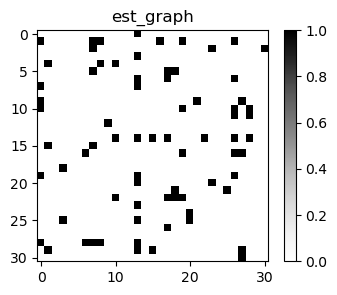

In [41]:
GraphDAG(est1)


# Save results

In [ ]:
from toolkit import *
import toolkit
import importlib
importlib.reload(toolkit)

<module 'toolkit' from '/Users/zhitaogao/Library/CloudStorage/OneDrive-Personal/80_DataProjects/causality-mfg/NeurIPS2023/toolkit.py'>

In [ ]:
toolkit.save_result(pc_estimated, dataset='dataset_3')

shape:  (31, 31)
Saved solution 1 for dataset dataset_3 to ./submission/solution1/dataset_3_graph_matrix.npy


In [ ]:
# graph_matrix = np.array(nt_estimated)
# graph_matrix.shape

# np.save(r'./submission/dataset_1_graph_matrix.npy',graph_matrix)

In [ ]:
toolkit.save_result(pc_estimated_with_prior, dataset='dataset_1')

Saved solution 1 for dataset dataset_1 to ./submission/solution1/dataset_1_graph_matrix.npy
